# Analysis of *Felis Catus* behavior

In this notebook we explore the effect of surprises on cats.

# Setup

In [1]:
devtools::install_github('Gibbsdavidl/CatterPlots')

Skipping install of 'CatterPlots' from a github remote, the SHA1 (ae17cd5e) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(CatterPlots)
library(tidyverse)


Welcome to CatterPlots.


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Data sampling and curation

In the accompanying data table, you can see the data that was meticulously and rigorously collected in the *Felis Catus* behavior experiment. Elapsed time and elevation measurements were gathered from the *Felis Catus* [historical video records](https://www.youtube.com/watch?v=6U_XREUMOAU). 

Each of the samples obtained include the initial point of suprise, max elevation obtained, and final elevation.

Samples with discontinous initial and final elevations (e.g. those of a cat leaping off of a bed or other furniture) were discarded for the purpose of this behavior analysis.

In [3]:
data <- tibble(
    'sample-name' = c('SC-01','SC-02','SC-03','SC-04','SC-05'),
    'video-ts' = c('0:01:00','0:19:00','0:22:00','0:32:00','1:25:00'),
    't-initial (ms)' =  c(0,0,0,0,0),
    't-max (ms)' = c(249,350,300,305,250),
    't-final (ms)' = c(500,700,620,635,485),
    'max-elevation (mm)' = c(450,750,500,500,350))

# Model creation

We created a mathematical model of surprised *Felis Catus*<sup>*</sup> elevations over time, which closely matches the observed behavior, based upon simplified Newtonian physics.


---



\* a surprised *Felis Catus* is perhaps more accurately named [*Miratus*](https://www.google.com/search?q=latin+Miratus+to+english&rlz=1CAOTWH_enUS896&sxsrf=APq-WBuOE6NGJE-cKAgk7J2wu2FE7w018g%3A1647822636169&ei=LMc3Yuj5BO6c0PEPw_q2wAw&ved=0ahUKEwjov4HX-dX2AhVuDjQIHUO9DcgQ4dUDCA4&uact=5&oq=latin+Miratus+to+english) *Felis Catus*

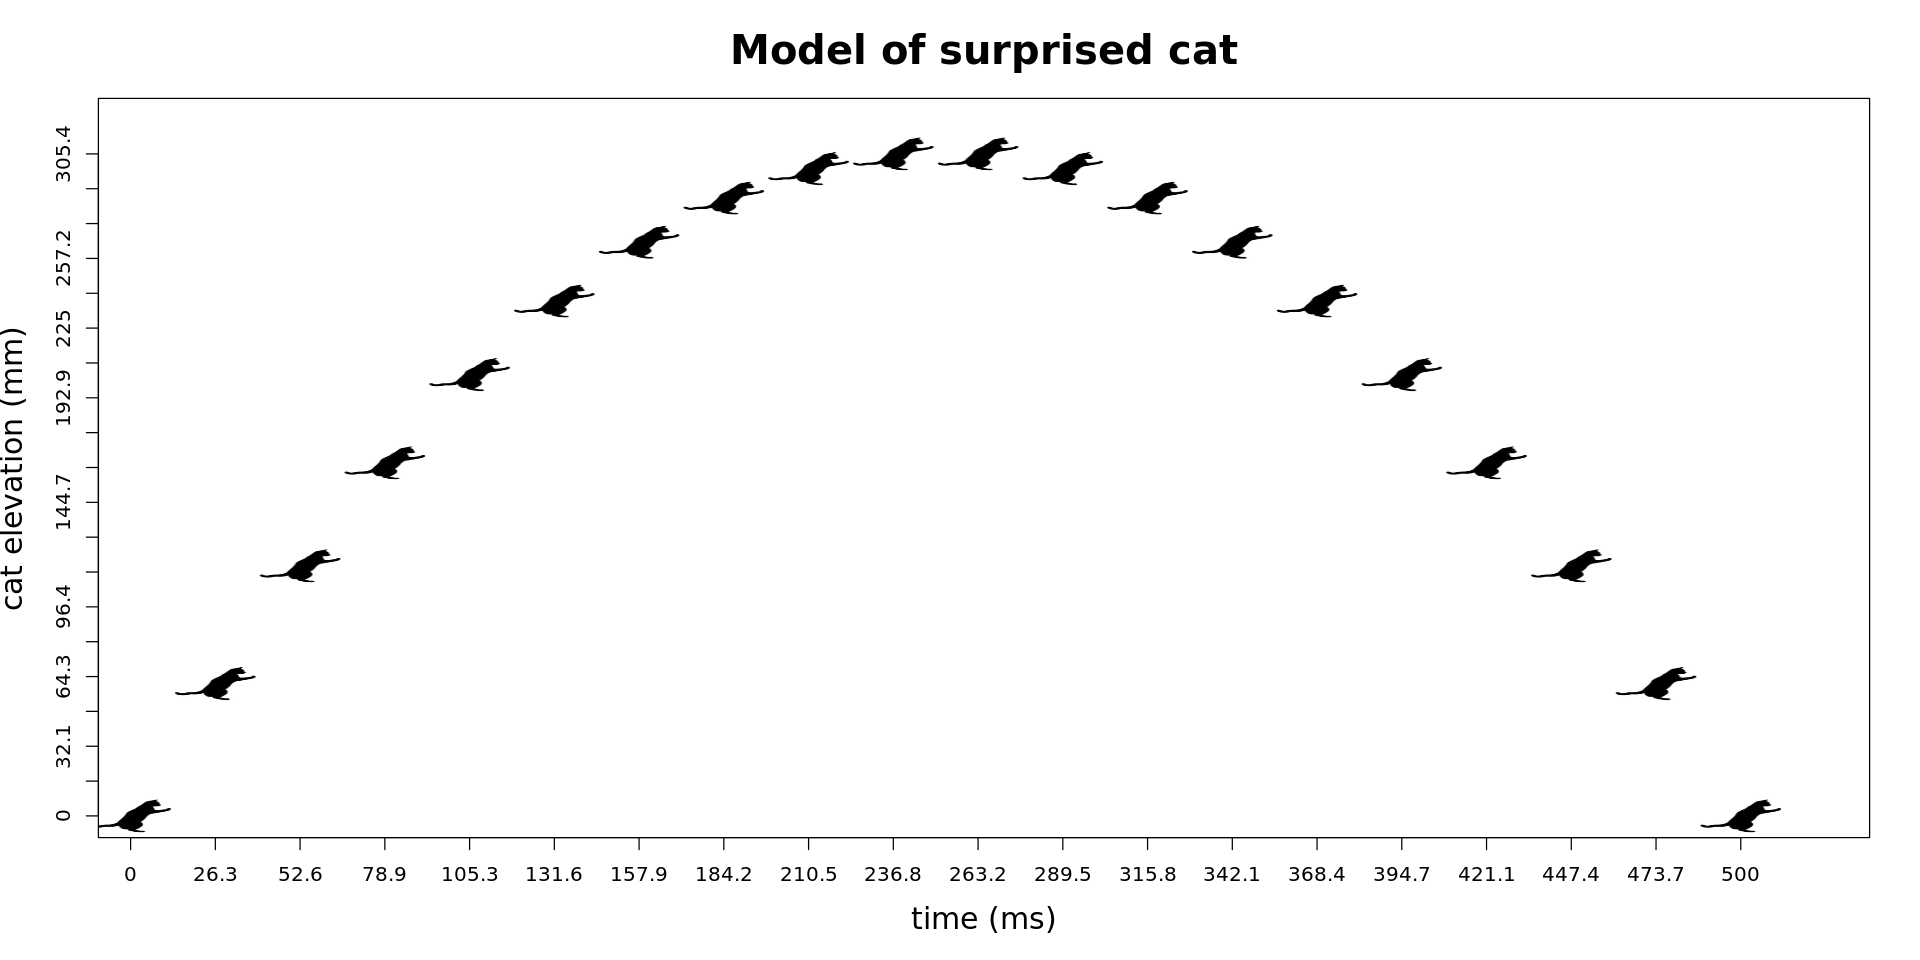

In [4]:
options(repr.plot.width=16, repr.plot.height=8)

t <- seq(0, 500, length.out=20) # Units are in milliseconds (ms).
g <- (9.8 * 1000) / (1000^2)   # Gravity (mm/ms**2).
y0 <- 0           # Initial height of cat prior to surprise (mm).
v0y <- 2.45       # Initial vertical velocity of suprised cat (mm/ms).

y <- y0 + v0y * t - 1/2 * g * t^2

purr <- catplot(xs = t, ys = y, cat = 3, size = 0.05, xlim = c(-10,500), ylim = c(-10,310),
                cex.lab = 1.5, cex.axis = 1.5, cex.main = 2.0, cex.sub = 1.5,
                xlab = 'time (ms)', ylab = 'cat elevation (mm)', main = 'Model of surprised cat')

# Application of model to obtained data set

Applying the model allows us to extrapolate intervening data points not recorded during initial data gathering, and to perform repeated theoretical experiments.  This likely would have been quite challenging to do with a real cat, as it is unlikely to have tolerated such shenanigans.

In [5]:
options(repr.plot.width=16, repr.plot.height=8)

## Append calculated landing velocity to dataframe and some aesthetics.
data <- data %>% mutate(
    'landing-velocity (mm/ms)' = 9.8 / 1000 * (`t-final (ms)` - `t-max (ms)`),
    cat_shape = seq(1, nrow(data)),
    cat_color = c('#33FCFF','#FF0000', '#0495EE','#EE7504', '#000000FF')
)

dim(data)

[1] 5 9

In [6]:
extrapolated_data <- pmap_dfr(data, function(`sample-name`, `video-ts`, `t-initial (ms)`, `t-max (ms)`,
                                             `t-final (ms)`, `max-elevation (mm)`, `landing-velocity (mm/ms)`,
                                             cat_shape, cat_color) {
    t <- seq(0, `t-final (ms)`, length.out=20) # Units are in milliseconds (ms).
    g <- (9.8 * 1000) / (1000^2)   # Gravity (mm/ms**2).
    y0 <- 0           # Initial height of cat prior to surprise (mm).
    v0y <- `landing-velocity (mm/ms)`       # Initial vertical velocity of suprised cat (mm/ms).
    y <- y0 + v0y * t - 1/2 * g * t^2
    tibble(
        tt = t,
        yy = y,
        'sample-name' = `sample-name`,
        'video-ts' = `video-ts`,
        't-initial (ms)' =  `t-initial (ms)`,
        't-max (ms)' = `t-max (ms)`,
        't-final (ms)' = `t-final (ms)`,
        'max-elevation (mm)' = `max-elevation (mm)`,
        'landing-velocity (mm/ms)' = `landing-velocity (mm/ms)`,
        cat_shape = cat_shape,
        cat_color = cat_color
    )
})
dim(extrapolated_data)

[1] 100  11

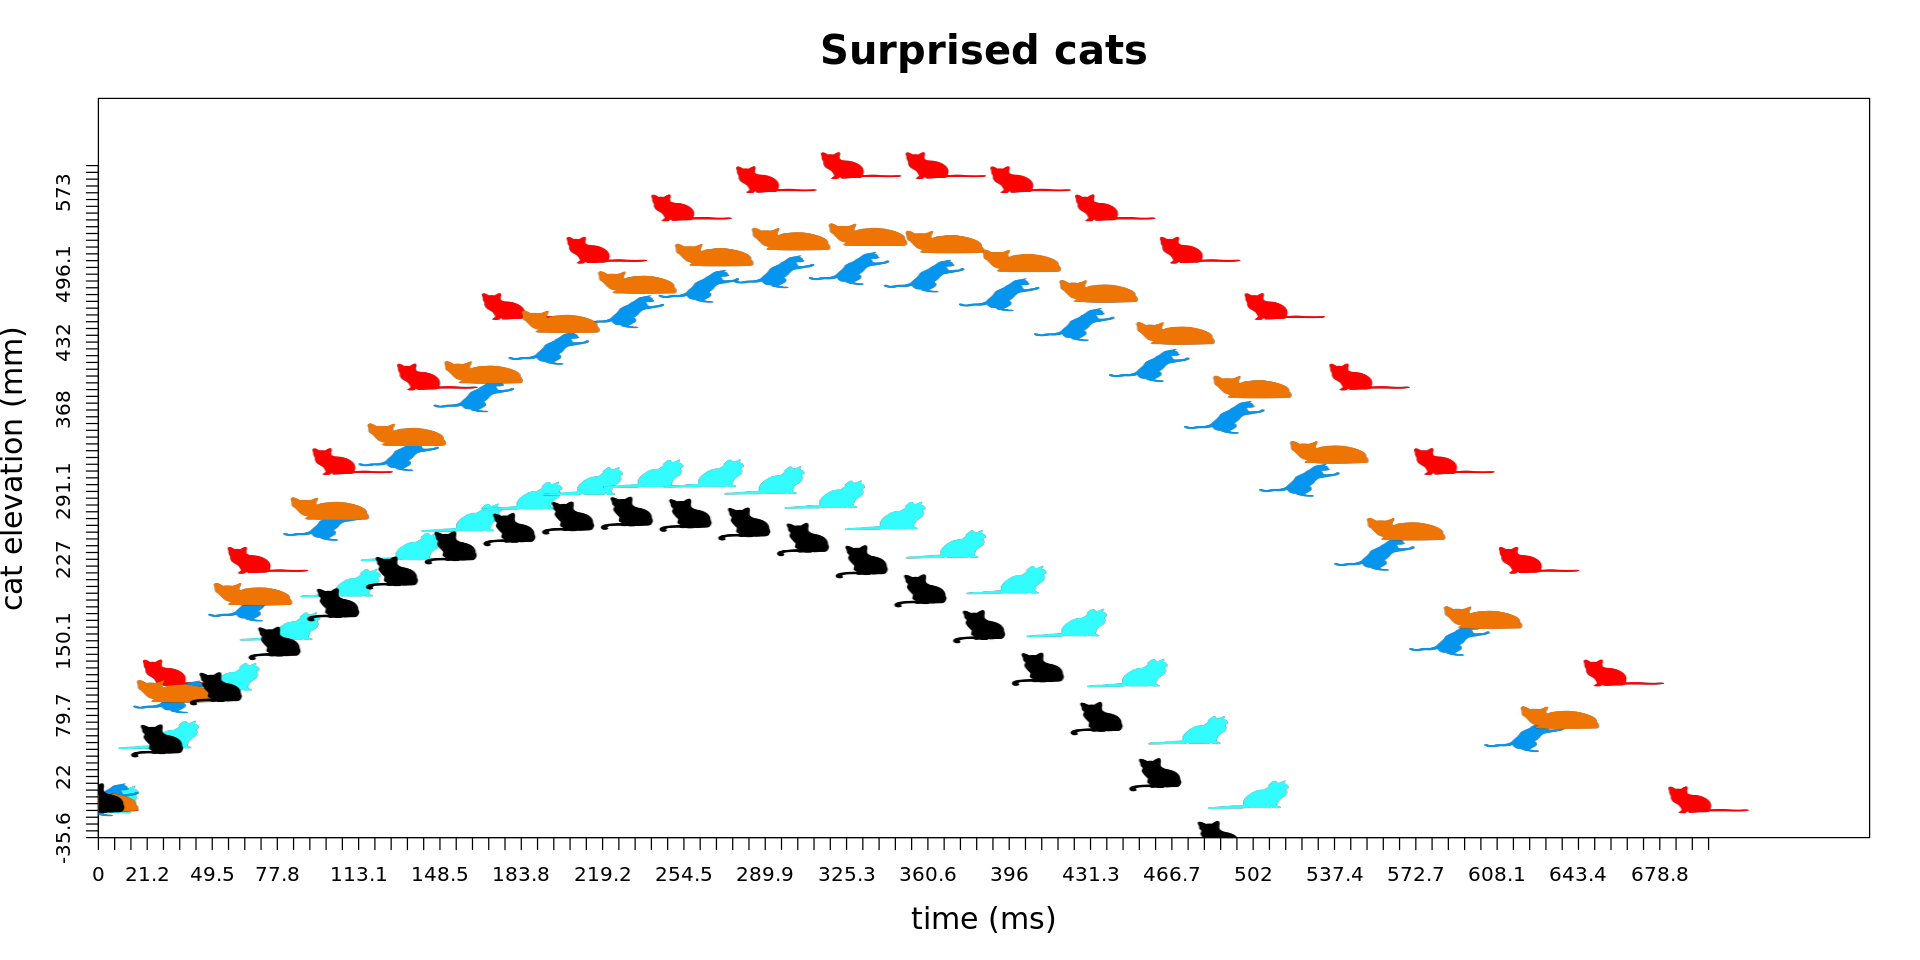

In [7]:
purr <- multicat(xs = extrapolated_data$tt, ys = extrapolated_data$yy,
                cat = extrapolated_data$cat_shape, size = 0.05, catcolor = extrapolated_data$cat_color,
                cex.lab = 1.5, cex.axis = 1.5, cex.main = 2.0, cex.sub = 1.5,
                xlab = 'time (ms)', ylab = 'cat elevation (mm)', main = 'Surprised cats')

# Discussion

As you can see, when cats are surprised, the result is an initial rapid gain in elevation followed by a corresponding reduction in elevation. The elevation plateau observed at the temporal mid-point as cat velocity approaches zero, due to the constant deceleration applied to the cat by the force of gravity. It at this mid-point that max elevation is achieved. 

After reaching max elevation and with negligible air-resistance at these velocities, the cat will experience free-fall, aka zero gravity from the cat's frame of reference. Throughout the cat's descent, elevation decreases faster and faster as gravity accelerates them earthbound, until their velocity comes to a stop as they return to their initial starting elevation.

<div class="alert alert-block alert-info">
For more detail on these scientific results, see the relevant <a href='https://github.com/Gibbsdavidl/CatterPlots'>literature</a>. The journal article is expected to appear in Nature on April 1, 2022.
</div>

## Potential future *Felis Catus* modeling

Development of a more complex model could perhaps answer additional questions, such as: 
 * Does air-resistance come into play as velocity increases, and if so, then what sort of an impact does fluffy vs short-haired cat species have?
 * Could terminal velocity (where air resistance cancels out the acceleration due to gravity) be reached on the return trip to earth?
   * What initial veritical leap velocity would be necessary to achieve this?
   * Is it even possible to surprise *Felis Catus* sufficiently for that leap to occur?

# Provenance

In [8]:
devtools::session_info()

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
assertthat,assertthat,0.2.1,0.2.1,/usr/local/lib/R/site-library/assertthat,/usr/local/lib/R/site-library/assertthat,FALSE,FALSE,2019-03-21,CRAN (R 4.1.2),NA,/usr/local/lib/R/site-library
backports,backports,1.4.1,1.4.1,/usr/local/lib/R/site-library/backports,/usr/local/lib/R/site-library/backports,FALSE,FALSE,2021-12-13,CRAN (R 4.1.2),NA,/usr/local/lib/R/site-library
base64enc,base64enc,0.1.3,0.1-3,/usr/local/lib/R/site-library/base64enc,/usr/local/lib/R/site-library/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.1.2),NA,/usr/local/lib/R/site-library
brio,brio,1.1.3,1.1.3,/usr/local/lib/R/site-library/brio,/usr/local/lib/R/site-library/brio,FALSE,FALSE,2021-11-30,CRAN (R 4.1.2),NA,/usr/local/lib/R/site-library
broom,broom,0.7.12,0.7.12,/usr/local/lib/R/site-library/broom,/usr/local/lib/R/site-library/broom,FALSE,FALSE,2022-01-28,CRAN (R 4.1.2),NA,/usr/local/lib/R/site-library
cachem,cachem,1.0.6,1.0.6,/usr/local/lib/R/site-library/cachem,/usr/local/lib/R/site-library/cachem,FALSE,FALSE,2021-08-19,CRAN (R 4.1.2),NA,/usr/local/lib/R/site-library
callr,callr,3.7.0,3.7.0,/usr/local/lib/R/site-library/callr,/usr/local/lib/R/site-library/callr,FALSE,FALSE,2021-04-20,CRAN (R 4.1.2),NA,/usr/local/lib/R/site-library
CatterPlots,CatterPlots,0.0.2,0.0.2,/home/jupyter/packages/CatterPlots,/home/jupyter/packages/CatterPlots,TRUE,FALSE,2022-03-27,Github (Gibbsdavidl/CatterPlots@ae17cd5e49ddda4ecfe0eba8a4c21df8c88e72c4),NA,/home/jupyter/packages
cellranger,cellranger,1.1.0,1.1.0,/usr/local/lib/R/site-library/cellranger,/usr/local/lib/R/site-library/cellranger,FALSE,FALSE,2016-07-27,CRAN (R 4.1.2),NA,/usr/local/lib/R/site-library


Copyright 2022 The Broad Institute, Inc., Verily Life Sciences, LLC All rights reserved.

This software may be modified and distributed under the terms of the BSD license. See the LICENSE file for details.